In [1]:
#load packages
import numpy as np
from netCDF4 import Dataset
import cPickle as pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',size=16,weight='bold') #set default font size and weight for plots

In [2]:
#unpickle ENSO composites
with open('SENH_F_composite_ElNino.pickle','rb') as fp:
    shfa_composite_elnino,shfa_series_elnino,p11,lon,lat = pickle.load(fp)

with open('SENH_F_composite_LaNina.pickle','rb') as fp:
    shfa_composite_lanina,shfa_series_lanina,p12,lon,lat = pickle.load(fp)

In [3]:
#unpickle ENSO composite
with open('EVAP_F_composite_ElNino.pickle','rb') as fp:
    lhfa_composite_elnino,lhfa_series_elnino,p21,lon,lat = pickle.load(fp)
    
with open('EVAP_F_composite_LaNina.pickle','rb') as fp:
    lhfa_composite_lanina,lhfa_series_lanina,p22,lon,lat = pickle.load(fp)

In [4]:
#unpickle ENSO composites
with open('TAUX_composite_ElNino.pickle','rb') as fp:
    txa_composite_elnino,txa_series_elnino,p31,lon,lat = pickle.load(fp)
    
with open('TAUX_composite_LaNina.pickle','rb') as fp:
    txa_composite_lanina,txa_series_lanina,p32,lon,lat = pickle.load(fp)

In [6]:
#unpickle ENSO composites
with open('TAUY_composite_ElNino.pickle','rb') as fp:
    tya_composite_elnino,tya_series_elnino,p41,lon,lat = pickle.load(fp)
    
with open('TAUY_composite_LaNina.pickle','rb') as fp:
    tya_composite_lanina,tya_series_lanina,p42,lon,lat = pickle.load(fp)

In [7]:
lhfa_series_elnino.shape

(281, 90, 90)

In [8]:
thfa_series_elnino = shfa_series_elnino + lhfa_series_elnino*2.501e6
thfa_composite_elnino = np.mean(thfa_series_elnino,axis=0)

thfa_series_lanina = shfa_series_lanina + lhfa_series_lanina*2.501e6
thfa_composite_lanina = np.mean(thfa_series_lanina,axis=0)

In [9]:
tp1 = stats.ttest_1samp(thfa_series_elnino,0.0,axis=0)
p1 = np.ma.masked_where(tp1[1]>=0.05,tp1[1])
p1 = np.ma.masked_where(p1==0,p1)
p1[~p1.mask]=1

tp2 = stats.ttest_1samp(thfa_series_lanina,0.0,axis=0)
p2 = np.ma.masked_where(tp2[1]>=0.05,tp2[1])
p2 = np.ma.masked_where(p2==0,p2)
p2[~p2.mask]=1

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:3370: RuntimeWarning: invalid value encountered in divide
  t = np.divide(d, denom)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1757: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1757: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1758: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater_equal


In [10]:
#plot only significant values
thfa_sig_elnino = np.ma.masked_where(p1!=1,thfa_composite_elnino)
thfa_sig_lanina = np.ma.masked_where(p2!=1,thfa_composite_lanina)

In [11]:
Nx,Ny = p31.shape
p31_reshape = np.reshape(p31,(Nx*Ny))
p41_reshape = np.reshape(p41,(Nx*Ny))
pv1 = np.zeros((Nx*Ny))
 
for i in range(Nx*Ny):
    if p31_reshape[i] == 1 and p41_reshape[i] == 1:
        pv1[i] = 1
    elif p31_reshape[i] == 1:
        pv1[i] = 1
    elif p41_reshape[i] == 1:
        pv1[i] = 1
    else:
        pv1[i] = float('NaN')
        
pv1 = np.reshape(pv1,(Nx,Ny))

In [12]:
Nx,Ny = p32.shape
p32_reshape = np.reshape(p32,(Nx*Ny))
p42_reshape = np.reshape(p42,(Nx*Ny))
pv2 = np.zeros((Nx*Ny))
 
for i in range(Nx*Ny):
    if p32_reshape[i] == 1 and p42_reshape[i] == 1:
        pv2[i] = 1
    elif p32_reshape[i] == 1:
        pv2[i] = 1
    elif p42_reshape[i] == 1:
        pv2[i] = 1
    else:
        pv2[i] = float('NaN')
        
pv2 = np.reshape(pv2,(Nx,Ny))

In [13]:
txa_sig_elnino = np.zeros((txa_composite_elnino.shape[0],txa_composite_elnino.shape[1]))
tya_sig_elnino = np.zeros((tya_composite_elnino.shape[0],tya_composite_elnino.shape[1]))

for i in range(txa_composite_elnino.shape[0]):
    for j in range(tya_composite_elnino.shape[1]):
        if pv1[i,j]==1:
            txa_sig_elnino[i,j] = txa_composite_elnino[i,j]/10.0
            tya_sig_elnino[i,j] = tya_composite_elnino[i,j]/10.0
        else:
            txa_sig_elnino[i,j] = float("NaN")
            tya_sig_elnino[i,j] = float("NaN")

In [14]:
txa_sig_lanina = np.zeros((txa_composite_lanina.shape[0],txa_composite_lanina.shape[1]))
tya_sig_lanina = np.zeros((tya_composite_lanina.shape[0],tya_composite_lanina.shape[1]))

for i in range(txa_composite_lanina.shape[0]):
    for j in range(tya_composite_lanina.shape[1]):
        if pv2[i,j]==1:
            txa_sig_lanina[i,j] = txa_composite_lanina[i,j]/10.0
            tya_sig_lanina[i,j] = tya_composite_lanina[i,j]/10.0
        else:
            txa_sig_lanina[i,j] = float("NaN")
            tya_sig_lanina[i,j] = float("NaN")

In [15]:
lon_180 = -(360-lon)

In [16]:
#define projection
xx, yy = np.meshgrid(lon, lat)
mm = Basemap(projection='cyl', lon_0 = -45, llcrnrlon=270, llcrnrlat=0, urcrnrlon=360, urcrnrlat=80)
x, y = mm(xx,yy) #converts rectangular meshgrid into meshgrid for the specific projection

In [17]:
uor1,vor1,xor,yor = mm.transform_vector(txa_sig_elnino,tya_sig_elnino,lon,lat,71,71,returnxy=True)
uor2,vor2,xor,yor = mm.transform_vector(txa_sig_lanina,tya_sig_lanina,lon,lat,71,71,returnxy=True)

/usr/local/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3109: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0


In [18]:
thfa_sig_elnino.shape

(90, 90)

In [26]:
#pickle for plotting
pname = 'TAU_THF_ATL_JFM_composite_ElNino.pickle'
with open(pname,'wb') as fp:
    pickle.dump([uor1,vor1,xor,yor,thfa_sig_elnino,x,y],fp)

pname = 'TAU_THF_ATL_JFM_composite_LaNina.pickle'
with open(pname,'wb') as fp:
    pickle.dump([uor2,vor2,xor,yor,thfa_sig_lanina,x,y],fp)

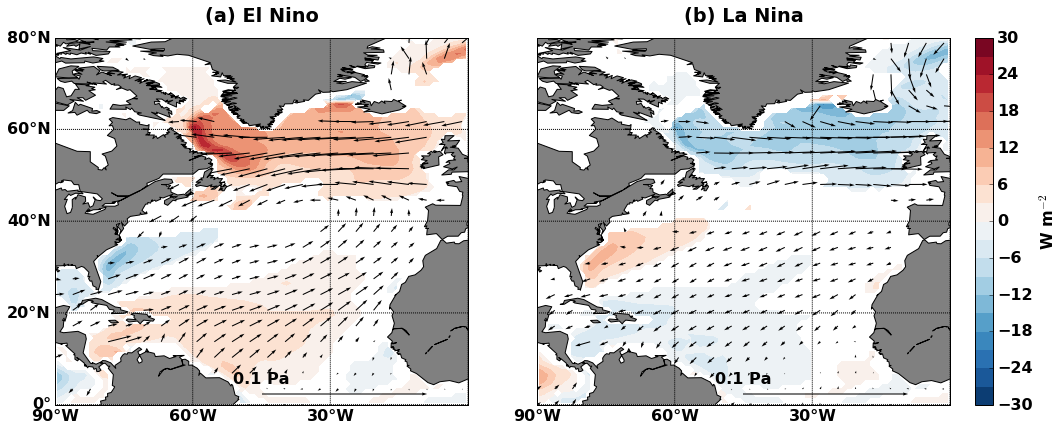

In [19]:
#plot in stereographic projetion
fig = plt.figure(figsize=(16,6))
vmin = np.around(np.min(thfa_sig_elnino),decimals=-1)
vmax = np.around(np.max(thfa_sig_elnino),decimals=-1)
if np.abs(vmin) > np.abs(vmax):
    vint = np.abs(np.around((vmin)/12,decimals=0))
    vmax = np.abs(vmin)
else:
    vint = np.around((vmax)/12,decimals=0)
    vmin = -vmax

v = np.linspace(int(vmin)-int(vint),int(vmax)+int(vint),13)
v = np.linspace(-30,30,21)
v2 = np.linspace(-30,30,11)

ax1 = fig.add_subplot(1,2,1)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.contourf(x,y, thfa_sig_elnino, v, cmap='RdBu_r')
#pc1.set_clim(-80,80)
pc2 = mm.quiver(xor[::3,::3],yor[::3,::3],uor1[::3,::3],vor1[::3,::3],scale=0.25)
qk = plt.quiverkey(pc2, 0.5, 0.03, 0.1, r'0.1 Pa',
                   fontproperties={'weight': 'bold'})
#pc2 = mm.scatter(x,y, p1,c='gray')
mm.fillcontinents(color='gray')
mm.drawparallels(range(0,90,20), labels=[1,0,0,0])
mm.drawmeridians(range(0,360,30), labels=[0,0,0,1])
plt.title('(a) El Nino', y=1.03, weight='bold')

plt.tight_layout()

ax1 = fig.add_subplot(1,2,2)
mm.drawcoastlines()
mm.drawmapboundary(fill_color='none')
pc1 = mm.contourf(x,y, thfa_sig_lanina, v, cmap='RdBu_r')
#pc1.set_clim(-80,80)
pc2 = mm.quiver(xor[::3,::3],yor[::3,::3],uor2[::3,::3],vor2[::3,::3],scale=0.25)
qk = plt.quiverkey(pc2, 0.5, 0.03, 0.1, r'0.1 Pa',
                   fontproperties={'weight': 'bold'})
#pc2 = mm.scatter(x,y, p1,c='gray')
mm.fillcontinents(color='gray')
mm.drawparallels(range(0,90,20), labels=[0,0,0,0])
mm.drawmeridians(range(0,360,30), labels=[0,0,0,1])
plt.title('(b) La Nina', y=1.03, weight='bold')

plt.tight_layout()

#add colorbar
cbar = fig.colorbar(pc1,pad=0.04)
cbar.set_label('W m$^{-2}$', fontsize=16,weight='bold') #SST: $^\circ$ C
cbar.set_ticks(v2,update_ticks=True)
cbar.ax.tick_params(labelsize=16)

#save figure
plt.savefig('SHF_TAU_JFM_ENSO.eps',bbox_inches='tight')

In [20]:
from area_diags import area_avg

In [21]:
ElNino_yrs = thfa_series_elnino[:,44:65,:]
LaNina_yrs = thfa_series_lanina[:,44:65,:]
lat2 = lat[44:65]

In [22]:
#area average to great timeseries
p = area_avg.averages()
ElNino_avg = p.LatLonavg(var=np.squeeze(ElNino_yrs[:,:,:]), lat=lat2, lon=lon)
LaNina_avg = p.LatLonavg(var=np.squeeze(LaNina_yrs[:,:,:]), lat=lat2, lon=lon)

In [23]:
tp11 = stats.ttest_1samp(ElNino_avg,0.0,axis=0)
p11 = np.ma.masked_invalid(tp11[1])
p11 = np.ma.masked_where(p11>=0.05,p11)
p11 = np.ma.masked_where(p11==0,p11)
p11[~p11.mask]=1

tp12 = stats.ttest_1samp(LaNina_avg,0.0,axis=0)
p12 = np.ma.masked_invalid(tp12[1])
p12 = np.ma.masked_where(p12>=0.05,p12)
p12 = np.ma.masked_where(p12==0,p12)
p12[~p12.mask]=1

In [24]:
print np.mean(ElNino_avg), np.mean(LaNina_avg)

6.61225266587 -5.11981150665


In [25]:
pname = 'THFavg_JFM_composite_ElNino.pickle'
with open(pname,'wb') as fp:
    pickle.dump([ElNino_avg,p11],fp)
    
pname = 'THFavg_JFM_composite_LaNina.pickle'
with open(pname,'wb') as fp:
    pickle.dump([LaNina_avg,p12],fp)